# Problem Statement
QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

## Download the Data

In [ ]:
from urllib.request import urlretrieve

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(medical_charges_url, 'medical.csv')


In [11]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('medical.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## Exploratory Analysis and Visualization

In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [12]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
fig = px.histogram(medical_df
                   ,x=medical_df['age'],
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

### Body Mass Index (BMI)

In [14]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

### Charges

This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [18]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='smoker',
                   marginal='box',
                   color_discrete_sequence=['green', 'gray'],
                   title='Distribution of Medical Charges for Smokers and Non-Smokers')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \
7300,the median for smokers is close to 7300,the median for smokers is close to 35,000

### Smoker

In [19]:
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males.

### Sex , Region and Children

In [22]:
# 1. Distribution of 'sex'
fig_sex = px.histogram(
    medical_df,
    x='sex',
    color='sex',
    title='Distribution of Sex',
    text_auto=True
)
fig_sex.update_layout(bargap=0.2)
fig_sex.show()

# 2. Distribution of 'region'
fig_region = px.histogram(
    medical_df,
    x='region',
    color='region',
    title='Distribution of Region',
    text_auto=True
)
fig_region.update_layout(bargap=0.2)
fig_region.show()

# 3. Distribution of 'children'
fig_children = px.histogram(
    medical_df,
    x='children',
    color='children',
    title='Distribution of Number of Children',
    text_auto=True
)
fig_children.update_layout(bargap=0.2)
fig_children.show()

### Age and Charges

In [21]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

- The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

- We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

    1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

    2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

    3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking

In [28]:
from plotly.subplots import make_subplots
import plotly.express as px

# base figure: 2x2, last one empty
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "(a) BMI by Smoking Status",
        "(b) Charges by Region & Smoking Status",
        "(c) Charges by Region (Violin)",
        ""  # empty
    ],
    horizontal_spacing=0.08,   # a bit tighter
    vertical_spacing=0.12
)

# (a) box: BMI vs smoker
fig_a = px.box(
    medical_df,
    x='smoker',
    y='bmi',
    color='smoker'
)
for tr in fig_a.data:
    # remove legend here; we'll show it only once
    tr.showlegend = False
    fig.add_trace(tr, row=1, col=1)

# (b) box: charges vs region
fig_b = px.box(
    medical_df,
    x='region',
    y='charges',
    color='smoker'
)
first = True
for tr in fig_b.data:
    # show legend only on this subplot
    tr.showlegend = first
    first = False
    fig.add_trace(tr, row=1, col=2)

# (c) violin: charges by region
fig_c = px.violin(
    medical_df,
    x='region',
    y='charges',
    color='smoker',
    box=True,
    points='all'
)
for tr in fig_c.data:
    # hide legend (we already showed it above)
    tr.showlegend = False
    # make points a bit smaller
    if "marker" in tr:
        tr.marker.update(size=3, opacity=0.5)
    fig.add_trace(tr, row=2, col=1)

# layout tweaks
fig.update_layout(
    title_text="Distributions & Group Comparisons",
    height=750,
    width=950,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.15,
        xanchor="center",
        x=0.5
    ),
    margin=dict(l=30, r=30, t=80, b=80),
    plot_bgcolor="white"
)

# optional: unify y-axes for row 1? (comment out if not wanted)
fig.update_yaxes(title_text="BMI", row=1, col=1)
fig.update_yaxes(title_text="Charges", row=1, col=2)
fig.update_yaxes(title_text="Charges", row=2, col=1)

fig.show()


# now: separate scatter-matrix, but make it smaller + tighter
fig_splom = px.scatter_matrix(
    medical_df,
    dimensions=['age', 'bmi', 'children', 'charges'],
    color='smoker',
    title='(d) Pairwise Relationships'
)
fig_splom.update_traces(diagonal_visible=False, marker=dict(size=4, opacity=0.6))
fig_splom.update_layout(
    height=650,
    width=650,
    margin=dict(l=20, r=20, t=60, b=20),
    legend=dict(orientation="h", y=-0.15, x=0.5, xanchor="center")
)
fig_splom.show()

### BMI and Charges

In [29]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

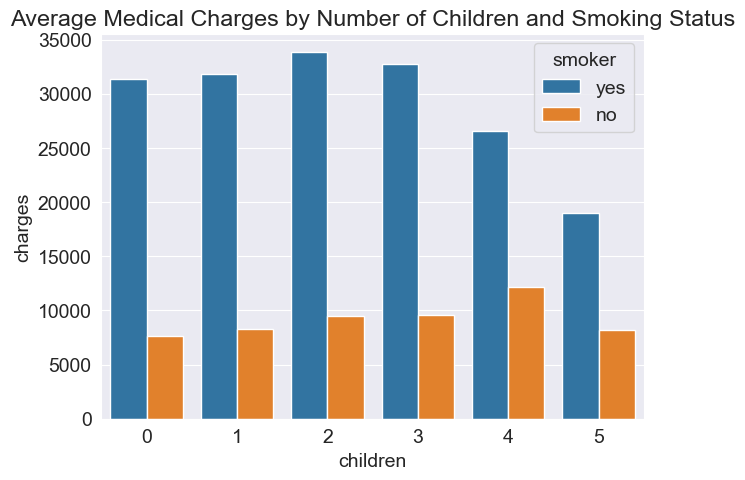

In [31]:

# Violin plot
fig = px.violin(
    medical_df,
    x='children',
    y='charges',
    color='smoker',
    box=True,
    points='all',
    title='Charges by Number of Children and Smoking Status'
)
fig.show()

# Bar plot (average)
plt.figure(figsize=(7,5))
sns.barplot(data=medical_df, x='children', y='charges', hue='smoker', errorbar=None)
plt.title("Average Medical Charges by Number of Children and Smoking Status")
plt.show()

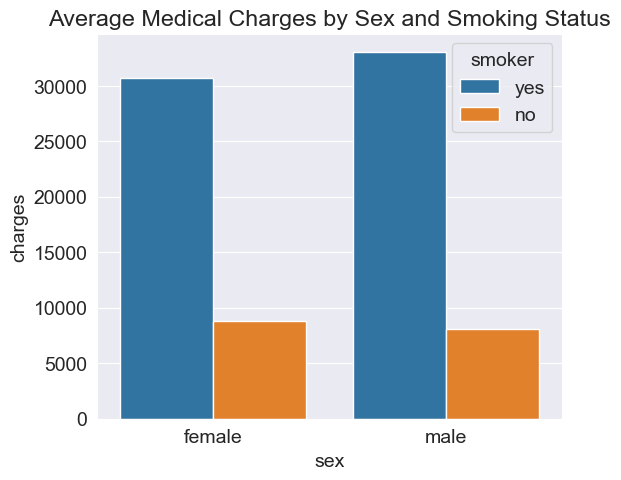

In [33]:
# Violin plot
fig = px.violin(
    medical_df,
    x='sex',
    y='charges',
    color='smoker',
    box=True,
    points='all',
    title='Charges by Sex and Smoking Status'
)
fig.show()

# Bar plot
plt.figure(figsize=(6,5))
sns.barplot(data=medical_df, x='sex', y='charges', hue='smoker', errorbar=None)
plt.title("Average Medical Charges by Sex and Smoking Status")
plt.show()


### Correlation

The values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [34]:
medical_df['charges'].corr(medical_df['age'])

np.float64(0.2990081933306476)

In [35]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362878)

In [39]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

Correlation coefficients can be interpreted as :
- **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    - The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    - A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

    - When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

- **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    - Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

    - Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

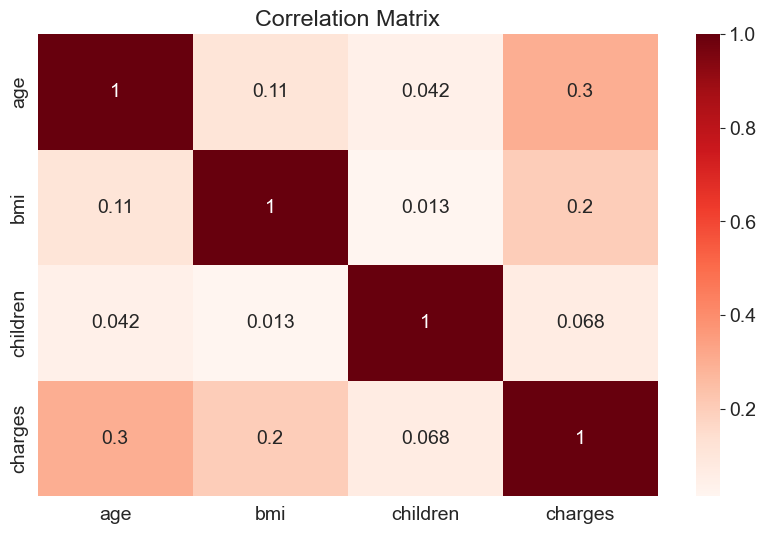

In [44]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

#### Correlation vs. Causation (More Details)

**Correlation** means two variables move together in some way.
**Causation** means one variable actually *produces* a change in the other.

So:

- **Correlation** = “X and Y change together.”
- **Causation** = “X changes → that makes Y change.”

These are **not** the same thing.

---

### What is causation?

We say **X causes Y** if:
1. X happens **before** Y (correct time order),
2. X and Y are **related** (when X changes, Y changes),
3. There is **no other reasonable explanation** for Y changing.

Example:
- Smoking → lung cancer
  Here, smoking comes first, there’s a strong relationship, and we can rule out many other explanations.

---

### Why correlation alone is not enough

Two variables can be correlated for reasons that are **not** causal:

1. **Reverse causality**
   - We think: X → Y
   - But actually: Y → X
   - Example: People who are sick buy more medicine. Is “buying medicine” causing sickness? No — sickness causes medicine-buying.

2. **Confounding variable (third factor)**
   - X and Y both depend on some hidden variable **Z**.
   - Example:
     - X = number of ice creams sold
     - Y = number of drownings
     - Z = hot weather
     - Ice cream does **not** cause drowning — both increase in summer.

3. **Spurious correlation**
   - Sometimes two things look correlated just by **chance**, especially in **small datasets** or when you compare **a lot** of variables.
   - Example: “People who own more TVs live longer.” → actually income/wealth is behind both.

4. **Omitted variable**
   - You forgot to include an important factor in the model, so the model “blames” the wrong feature.
   - Example: Predicting health costs using age only → you ignore smoking → age looks more important than it is.

5. **Simpson’s paradox**
   - A trend appears in **groups**, but disappears (or reverses) when groups are combined.
   - This happens when you ignore a key grouping variable.

---

### Why this matters in machine learning

- ML can **find patterns**, but it **cannot tell** whether the pattern is *causal*.
- A model can say: “Smokers have higher charges.”
  But it cannot say: “If this person stops smoking, their charges will go down by exactly X.”
  That requires **causal reasoning** or **experiments**.

---

### How to get closer to causation

- Randomized experiments (A/B tests)
- Longitudinal / time-based data
- Controlling for confounders
- Domain knowledge (humans!)
- Causal inference methods (DAGs, do-calculus, matching, IVs)

---

**Summary:**
Correlation is useful for **exploration**.
Causation is needed for **decisions**.
Only humans (or causal methods) can tell *why* something happens — ML alone can’t.


## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [45]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no']

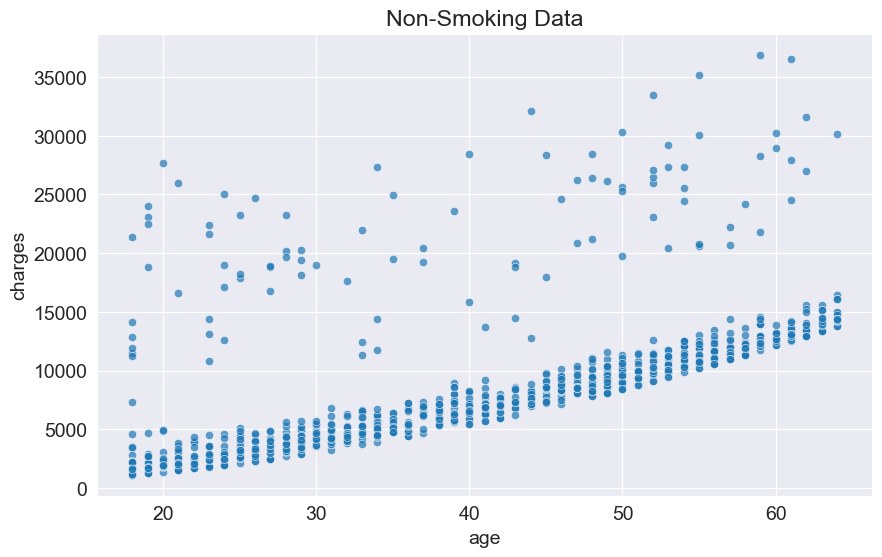

In [46]:
plt.title('Non-Smoking Data');
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7);

### Fitting a Line to the Data

Apart from a few exceptions, the points seem to form a line.
We can try to **fit a line** through these points and use it to predict medical charges for a given age.

A line on X–Y coordinates follows the equation:

\[
y = w x + b
\]

where:
- **w** → slope of the line
- **b** → intercept (the value of *y* when *x = 0*)

### Linear Regression Model

In this case, the **x-axis** represents **age** and the **y-axis** represents **charges**.
We assume the following relationship between the two:

$\text{charges} = w \times \text{age} + b$

Our goal is to determine the values of **w** (slope) and **b** (intercept) that best fit the data.

This technique is called **linear regression**, and the equation above is known as a **linear regression model**, as it models the relationship between age and charges using a straight line.

- **w** and **b** are called the **parameters** or **weights** of the model.
- The values in the **age** column are the **inputs (features)**.
- The values in the **charges** column are the **targets (outputs)**.

Let’s define a helper function `estimate_charges` to compute `charges` given `age`, `w`, and `b`.



In [47]:
def estimate_charges(age, w, b):
    return w * age + b

In [48]:
w = 50
b = 100

In [49]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

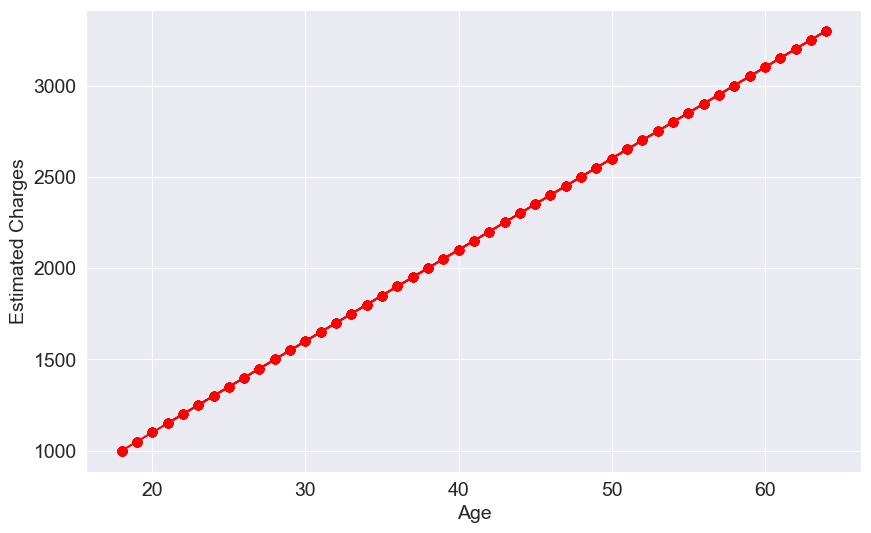

In [51]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our model fits the data.

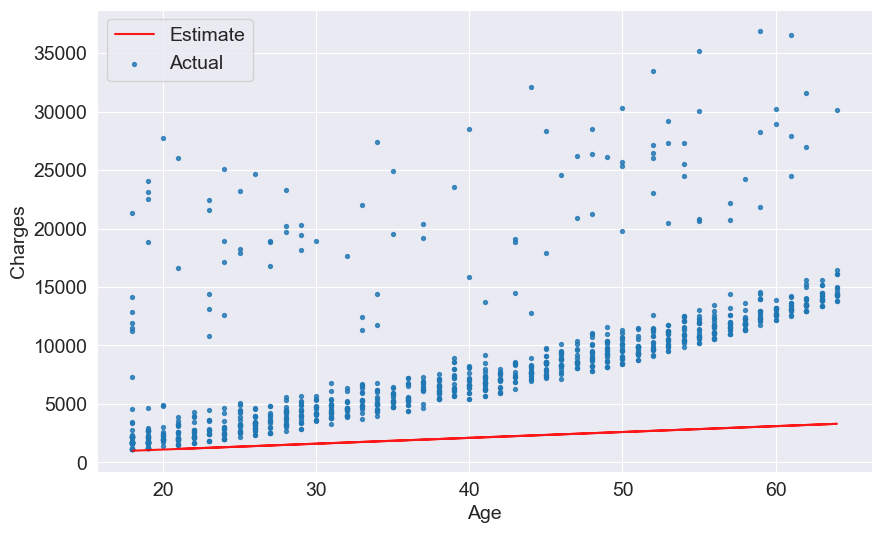

In [52]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of
w
w and
b
b to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [53]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

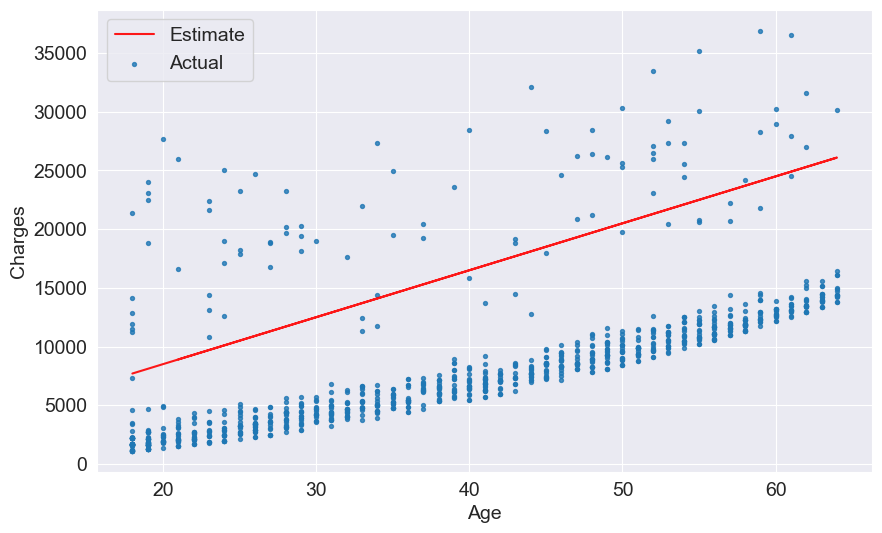

In [55]:
try_parameters(400, 500)

### Learning the Relationship Between Age and Charges

As we change the values of **w** and **b** manually, moving the line visually closer to the points,
we begin to understand the approximate relationship between **age** and **charges**.

Wouldn't it be nice if a computer could automatically try different values of **w** and **b**
and learn the relationship between **age** and **charges**?

To achieve this, we need to solve two problems:

1. We need a way to **measure how well the line fits the data points**.
2. Once this "measure of fit" is computed, we need a way to **adjust** **w** and **b** to improve the fit.

If we can solve these problems, a computer can determine the best values for **w** and **b**,
starting from a random guess.

---

### Loss / Cost Function

We can compare our model’s predictions with the actual targets using a **loss function**.
One common choice is the **Root Mean Squared Error (RMSE)**, calculated as follows:

1. Compute the **difference** between actual targets and predicted values (called **residuals**).
2. **Square** each residual to remove negative signs.
3. Compute the **average** of all squared residuals.
4. Take the **square root** of this average.

The result is a single number — the **RMSE** — which tells us how far, on average,
our predictions are from the actual data points.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

where:

\
\begin{aligned}
y_i & = \text{actual target value} \\
\hat{y}_i & = \text{predicted value} \\
n & = \text{number of samples}
\end{aligned}


The RMSE gives a single number that represents, on average,
how far the predictions are from the true values.



In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [58]:
w = 50
b = 100

In [59]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [60]:
rmse(targets, predicted)

np.float64(8461.949562575493)

### Interpreting the Loss

The computed value (e.g., **\$8461**) means that, on average,
each predicted value differs from the actual target by about **\$8461**.

This value is called the **loss** because it indicates **how poorly or well**
the model predicts the target variable. It represents the **information loss** in the model —
the **lower** the loss, the **better** the model fits the data.

Next, let’s modify the `try_parameters` function to also display the calculated loss.


In [61]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [ ]:
try_parameters(350, -4000)

### Optimizer

Next, we need a **strategy** to change the weights \( w \) and \( b \) so that the **loss decreases** and the line fits the data better.
This process is called **optimization**.

There are two main methods for this:

---

### 1. Ordinary Least Squares (OLS)

**Goal:** Find the parameters \( w \) and \( b \) that minimize the **sum of squared errors**.

For a linear model:

$$
\hat{y} = Xw + b
$$

The **OLS solution** is computed using a closed-form matrix equation:

$$
\hat{w} = (X^{T}X)^{-1}X^{T}y
$$

If you include a bias term, you typically add a column of ones to \( X \).

**Key idea:** OLS directly computes the best parameters using matrix algebra — no iteration needed.

---

### 2. Stochastic Gradient Descent (SGD)

**Goal:** Also minimize the loss, but **iteratively**.

For a simple linear model:

$$
\hat{y} = wx + b
$$

and the **squared error loss**:

$$
L = \frac{1}{2}(\hat{y} - y)^2
$$

The **gradients** (partial derivatives) are:

$$
\frac{\partial L}{\partial w} = (\hat{y} - y)x
$$

$$
\frac{\partial L}{\partial b} = (\hat{y} - y)
$$

The **update rules** become:

$$
w := w - \eta \frac{\partial L}{\partial w}
$$

$$
b := b - \eta \frac{\partial L}{\partial b}
$$

or equivalently:

$$
w := w - \eta (\hat{y} - y)x
$$

$$
b := b - \eta (\hat{y} - y)
$$

where \( \eta \) is the **learning rate** — the step size that controls how quickly we move toward the minimum.

---

### How Gradient Descent Works (Intuition)

- Imagine the **loss** as a hill-shaped surface.
- The **gradient** shows the direction of steepest ascent.
- You move in the **opposite** direction (downhill).
- After many small steps, you reach the **minimum**, where the loss is smallest — the best-fit line.

---

### Summary

- **Ordinary Least Squares (OLS)** → Computes the best-fit line **in one step** using algebra:

  $$
  \hat{w} = (X^{T}X)^{-1}X^{T}y
  $$

- **Gradient Descent (SGD)** → Improves the line **gradually** using repeated updates:

  $$
  \theta := \theta - \eta \nabla_{\theta} L
  $$

  where \( \theta \) represents all parameters (e.g. \( w, b \)),
  and \( \eta \) is the **learning rate** controlling the step size.



## Linear Regression using Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()
inputs = non_smoker_df[['age']].to_numpy()
targets = non_smoker_df.charges

model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [71]:
predictions = model.predict(inputs)

In [72]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [73]:
# w
model.coef_

array([267.24891283])

In [74]:
# b
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


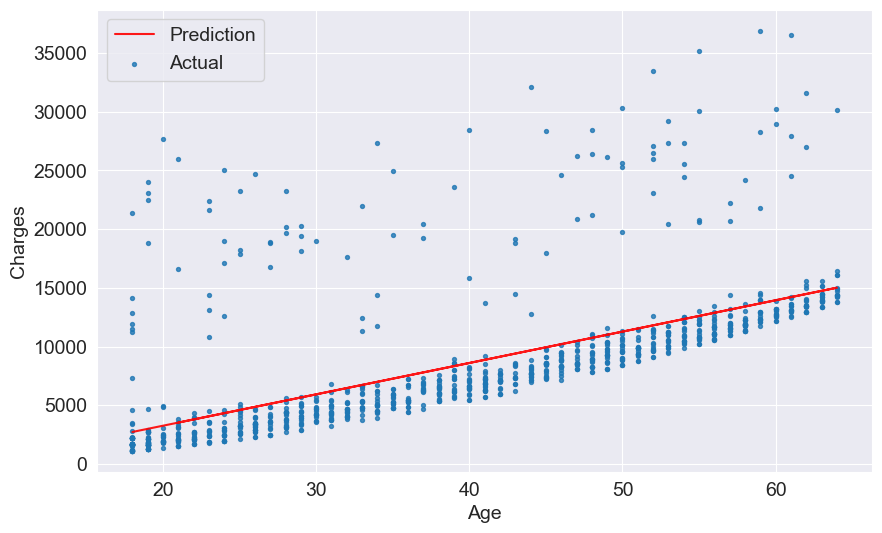

In [75]:
try_parameters(model.coef_, model.intercept_)

In [76]:
# EXERCISE 1: Train a model with SGDRegressor (stochastic gradient descent)
from sklearn.linear_model import SGDRegressor
import numpy as np

# we'll use the same non-smoker subset
X = non_smoker_df[['age']].to_numpy()
y = non_smoker_df['charges'].to_numpy()

sgd_model = SGDRegressor(
    loss="squared_error",
    learning_rate="invscaling",
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
sgd_model.fit(X, y)

# make some predictions
sgd_preds = sgd_model.predict(X)

# compute loss (using your rmse helper)
sgd_rmse = rmse(y, sgd_preds)
print("SGD RMSE (non-smokers):", sgd_rmse)

# compare with LinearRegression
lin_preds = model.predict(X)
lin_rmse = rmse(y, lin_preds)
print("OLS/LinearRegression RMSE (non-smokers):", lin_rmse)

# optional: check learned params
print("SGD w:", sgd_model.coef_)
print("SGD b:", sgd_model.intercept_)


SGD RMSE (non-smokers): 69532.32898953982
OLS/LinearRegression RMSE (non-smokers): 4662.505766636395
SGD w: [-437.9623491]
SGD b: [-42978.34928207]


### Comparing OLS vs. SGD on Non-Smokers

- **SGD RMSE (non-smokers): 69,532.33**
- **OLS/LinearRegression RMSE (non-smokers): 4,662.51**

**What does this mean?**

- **RMSE** (Root Mean Squared Error) tells us, on average, how far our predictions are from the actual charges.
- The **OLS model** (the one we trained with `LinearRegression`) has a **much smaller** RMSE (≈ 4.6k), so it’s doing a **good job** of fitting the data.
- The **SGD model** has a **very large** RMSE (≈ 69k), which means **its predictions are way off**.

**Why is SGD so bad here?**

- SGD is iterative and sensitive to **learning rate**, **number of iterations**, and **feature scaling**.
- We used it with **default settings** and **no scaling**, so it didn’t converge to a good solution.
- OLS, on the other hand, **directly computes** the best line for this simple 1D problem, so it’s usually better here.

**Conclusion:**
For this small, clean dataset (non-smokers, 1 feature = age), **ordinary least squares is clearly better**.
To make SGD comparable, we’d need to:
1. scale `age` (e.g. `StandardScaler`)
2. tune the learning rate / max_iter
3. maybe use a different learning schedule.


In [77]:
# EXERCISE 2: Train a linear regression model for *smokers only*
from sklearn.linear_model import LinearRegression
import plotly.express as px

# filter smokers
smoker_df = medical_df[medical_df['smoker'] == 'yes']

X_smoker = smoker_df[['age']].to_numpy()
y_smoker = smoker_df['charges'].to_numpy()

smoker_model = LinearRegression()
smoker_model.fit(X_smoker, y_smoker)

# predictions
smoker_preds = smoker_model.predict(X_smoker)

# compute loss
smoker_rmse = rmse(y_smoker, smoker_preds)
print("LinearRegression RMSE (smokers):", smoker_rmse)

# visualize: age vs actual & predicted
viz_df = smoker_df.copy()
viz_df['predicted_charges'] = smoker_preds

fig = px.scatter(
    viz_df,
    x='age',
    y='charges',
    title='Smokers: Actual vs Predicted Charges',
    opacity=0.6
)
fig.add_scatter(
    x=viz_df['age'],
    y=viz_df['predicted_charges'],
    mode='lines',
    name='Predicted (linear fit)',
    line=dict(width=3)
)
fig.show()


LinearRegression RMSE (smokers): 10711.00334810241


### Why is the line "in the middle" of the smoker points?

When we trained a linear regression **only on smokers**, we told the model:

> “Fit **one straight line** that best explains how charges change with age **for all smokers**.”

But in the data, smoker charges are **very spread out** — some smokers pay “normal” amounts, and some pay **extremely high** charges (likely due to other factors like BMI > 30, health conditions, number of children, etc.). Because of this:

- The model can’t pass through **all** the points.
- So it finds a line that **minimizes the overall error**.
- That line will look like it’s **floating between** the dots — that’s normal.

This tells us an important modeling insight:

> **Age alone is not enough to predict charges for smokers.**
> For smokers, we probably also need **BMI, number of children, maybe region, and definitely a non-linear model**.

So the line in the smoker plot is still useful — it shows the **general upward trend** (older smokers → higher charges), but it also shows that **a simple linear model underfits** this group.


## What is Machine Learning?

Machine learning is the process of **finding the best parameters** to model the relationship between some **features** (inputs) and **targets** (outputs).

Every machine learning problem has **three main components**:

1. **Model** – the mathematical function we use to make predictions
2. **Cost (Loss) Function** – a way to measure how good or bad the model’s predictions are
3. **Optimizer** – the method/algorithm used to adjust the model’s parameters to reduce the loss


## Linear Regression Using Multiple Features

So far, we’ve used only the **age** feature to estimate **charges**.
Adding another feature like **BMI** is straightforward. We simply assume the following relationship:

$$
\text{charges} = w_1 \times \text{age} \;+\; w_2 \times \text{bmi} \;+\; b
$$

Here:
- \( w_1 \) is the weight for **age**
- \( w_2 \) is the weight for **BMI**
- \( b \) is the intercept (bias)


In [78]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [79]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [80]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Clearly, BMI has a much lower weightage, and we can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: we can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm we apply.

In [81]:
# EXERCISE: Train a Linear Regression model to estimate charges using BMI alone

from sklearn.linear_model import LinearRegression
import plotly.express as px

# 1. Prepare inputs (BMI only) and targets
X_bmi = medical_df[['bmi']].to_numpy()
y_bmi = medical_df['charges'].to_numpy()

# 2. Create and train the model
bmi_model = LinearRegression()
bmi_model.fit(X_bmi, y_bmi)

# 3. Make predictions
bmi_preds = bmi_model.predict(X_bmi)

# 4. Compute RMSE (using your rmse helper)
bmi_rmse = rmse(y_bmi, bmi_preds)
print("Linear Regression RMSE (using BMI only):", bmi_rmse)

# 5. Visualize actual vs predicted
viz_df = medical_df.copy()
viz_df['predicted_charges'] = bmi_preds

fig = px.scatter(
    viz_df,
    x='bmi',
    y='charges',
    title='Charges vs. BMI (Actual vs Predicted)',
    opacity=0.6
)
fig.add_scatter(
    x=viz_df['bmi'],
    y=viz_df['predicted_charges'],
    mode='lines',
    name='Predicted (linear fit)',
    line=dict(width=3, color='red')
)
fig.show()

# 6. Display model parameters
print("w (slope):", bmi_model.coef_)
print("b (intercept):", bmi_model.intercept_)


Linear Regression RMSE (using BMI only): 11864.986308399499


w (slope): [393.8730308]
b (intercept): 1192.9372089611497


### Observations

- The **line fits poorly** compared to models using `age` or `age + bmi`.
- The **RMSE** is higher, confirming that **BMI alone** is not a strong predictor of medical charges.
- The **weight (w)** for BMI is small, showing its limited influence on charges.
- This reinforces the idea that adding weak features doesn’t improve model performance.


### Adding Another Feature: Children

Let’s go one step further and add the final numeric column — **`children`**,
which appears to have some correlation with **`charges`**.

We now assume the following relationship:

$$
\text{charges} = w_1 \times \text{age} \;+\; w_2 \times \text{bmi} \;+\; w_3 \times \text{children} \;+\; b
$$

Here:
- \( w_1 \) → weight for **age**
- \( w_2 \) → weight for **BMI**
- \( w_3 \) → weight for **number of children**
- \( b \) → intercept (bias)

Adding multiple features allows the model to capture more factors that may influence medical charges.


In [82]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [83]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

In [84]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

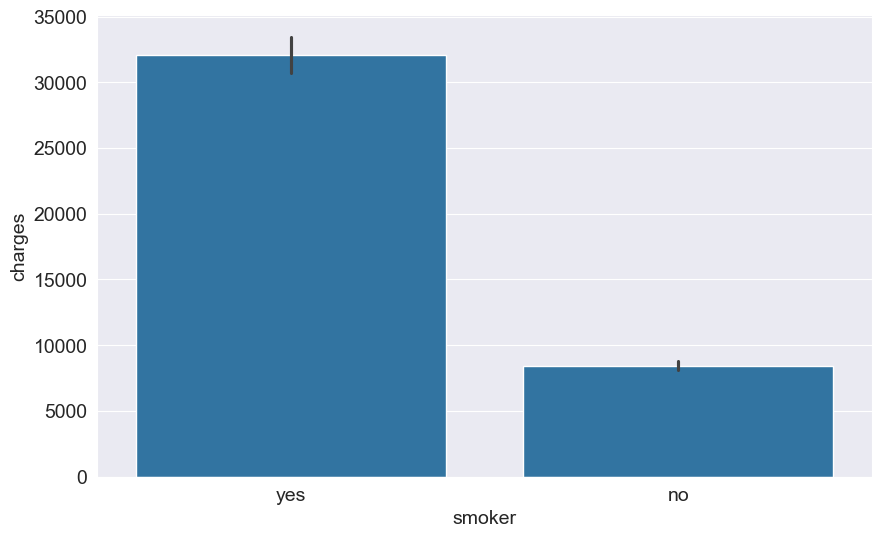

In [85]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [86]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [87]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + b$

In [88]:
inputs,targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

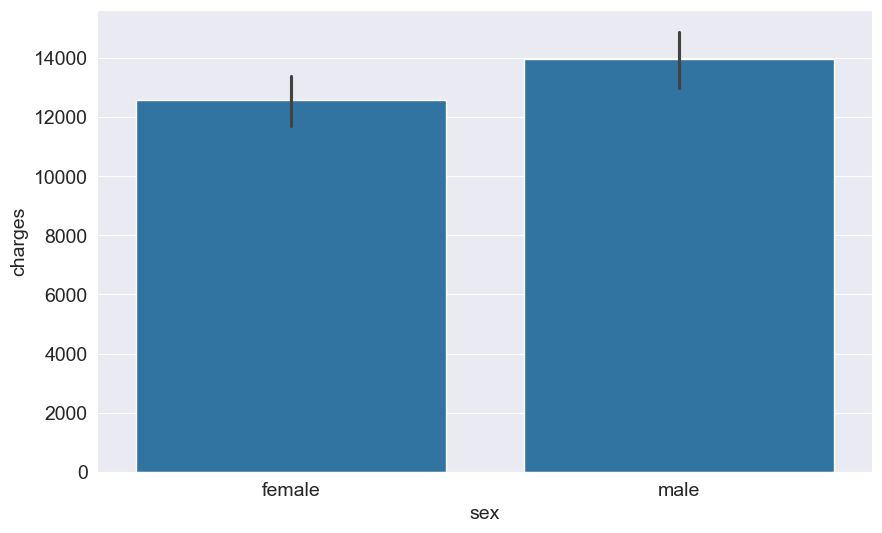

In [89]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [92]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [91]:
input,targets = medical_df[['age', 'bmi', 'children', 'smoker_code','sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [96]:

# One-hot encode 'region'
region_dummies = pd.get_dummies(medical_df['region'], prefix='', prefix_sep='')
medical_df = pd.concat([medical_df, region_dummies], axis=1)

# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code',
              'northeast', 'northwest', 'southeast', 'southwest']
inputs = medical_df[input_cols]
targets = medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions and compute loss
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Once again, this leads to a fairly small reduction in the loss.

> **EXERCISE**: Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? Why or why not? Try it out and see if you can justify your answer with data.

In [97]:
# Split the data
smoker_df = medical_df[medical_df['smoker_code'] == 1]
non_smoker_df = medical_df[medical_df['smoker_code'] == 0]

# Define input columns
input_cols = ['age', 'bmi', 'children', 'sex_code',
              'northeast', 'northwest', 'southeast', 'southwest']

# Prepare inputs and targets for each subset
X_smoker, y_smoker = smoker_df[input_cols], smoker_df['charges']
X_non_smoker, y_non_smoker = non_smoker_df[input_cols], non_smoker_df['charges']

# Train separate models
smoker_model = LinearRegression().fit(X_smoker, y_smoker)
non_smoker_model = LinearRegression().fit(X_non_smoker, y_non_smoker)

# Predictions
smoker_preds = smoker_model.predict(X_smoker)
non_smoker_preds = non_smoker_model.predict(X_non_smoker)

# Compute losses
smoker_loss = rmse(y_smoker, smoker_preds)
non_smoker_loss = rmse(y_non_smoker, non_smoker_preds)

print(f"Smoker Model RMSE: {smoker_loss:.2f}")
print(f"Non-Smoker Model RMSE: {non_smoker_loss:.2f}")

# Combined average loss (weighted)
combined_rmse = ((len(smoker_df) * smoker_loss) + (len(non_smoker_df) * non_smoker_loss)) / len(medical_df)
print(f"Combined Weighted RMSE: {combined_rmse:.2f}")

# Compare with the single model
X_all = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code',
                    'northeast', 'northwest', 'southeast', 'southwest']]
y_all = medical_df['charges']
single_model = LinearRegression().fit(X_all, y_all)
single_preds = single_model.predict(X_all)
single_loss = rmse(y_all, single_preds)

print(f"Single Combined Model RMSE: {single_loss:.2f}")

Smoker Model RMSE: 5668.47
Non-Smoker Model RMSE: 4573.07
Combined Weighted RMSE: 4797.39
Single Combined Model RMSE: 6041.68


### Observations

- **Smoker Model RMSE:** 5668.47
- **Non-Smoker Model RMSE:** 4573.07
- **Combined Weighted RMSE:** 4797.39
- **Single Combined Model RMSE:** 6041.68

From these results, we can clearly see that:

- The **separate models** (one for smokers and one for non-smokers) achieve a **lower overall error** (≈ 4797) than the **single combined model** (≈ 6041).
- This means that modeling smokers and non-smokers **independently** gives more accurate predictions.
- The reason is that smokers and non-smokers follow **very different charge patterns** — smoking status has a **strong, nonlinear impact** on medical costs.
- A single linear regression model tries to fit **one straight line** across both groups, which oversimplifies the relationship and leads to higher loss.

**Conclusion:**
Creating **two separate models** (for smokers and non-smokers) provides a **better fit** and more realistic predictions because it allows each group to have its own slope and intercept, reflecting their distinct relationships between features and medical charges.


## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [98]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [99]:
model.intercept_

np.float64(-12525.547811195444)

In [103]:
# Check model info
print("Number of coefficients:", len(model.coef_))
print("Number of input columns:", len(input_cols))

# Create the weights DataFrame safely
features = list(input_cols) + ["intercept"]
weights = np.append(model.coef_, model.intercept_)

# Ensure both have the same length
if len(features) == len(weights):
    weights_df = pd.DataFrame({"feature": features, "weight": weights})
else:
    print("⚠️ Length mismatch! Adjusting automatically...")
    min_len = min(len(features), len(weights))
    weights_df = pd.DataFrame({
        "feature": features[:min_len],
        "weight": weights[:min_len]
    })

weights_df

Number of coefficients: 9
Number of input columns: 8
⚠️ Length mismatch! Adjusting automatically...


,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,sex_code,23848.534542
4,northeast,-131.314359
5,northwest,587.009235
6,southeast,234.045336
7,southwest,-448.012814
8,intercept,-373.041756


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.


We can apply scaling using the StandardScaler class from `scikit-learn`.

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [106]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [107]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [108]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [109]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [110]:
from sklearn.model_selection import train_test_split

In [114]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(
    inputs,
    targets,
    test_size=0.1,
    random_state=42
)

In [ ]:
# ---------------------------------------------
# 🧠 1. Train the model on the TRAINING data
# ---------------------------------------------
# The model learns the relationship between inputs (features)
# and targets (charges) using ONLY the training data.
model = LinearRegression().fit(inputs_train, targets_train)


# ---------------------------------------------
# 🧪 2. Evaluate the model on the TEST data
# ---------------------------------------------
# Now we use the trained model to make predictions on the test set.
# These are data points the model has NEVER seen before.
# This tests how well the model GENERALIZES to new data.
predictions_test = model.predict(inputs_test)

# Compare the model's predictions with the actual target values
# from the test set using RMSE (Root Mean Squared Error).
loss = rmse(targets_test, predictions_test)
print('🧾 Test Loss:', loss)


# ---------------------------------------------
# 📊 3. (Optional) Evaluate the model on TRAINING data
# ---------------------------------------------
# This checks how well the model fits the data it was trained on.
# A big difference between Training Loss and Test Loss indicates overfitting.
predictions_train = model.predict(inputs_train)

# Compute RMSE for the training data
loss = rmse(targets_train, predictions_train)
print('📘 Training Loss:', loss)


### Why is the training loss lower than the test loss?

- The model is **trained** on the training data, so it has already "seen" those examples and adjusted its parameters (w, b, …) to fit them.
- The test data is **new** to the model — it has never seen these rows before.
- So the model will **always** do better on the data it was optimized for (training set) than on unseen data (test set).

A good mental model:

- **Training loss** → “How well can I memorize/fit what I’ve already seen?”
- **Test loss** → “How well can I generalize to new, unseen data?”

If the **gap** between training and test loss is:
- **Small** → good, model is generalizing well.
- **Very large** → model may be **overfitting** (learning noise/patterns that don’t hold for new data).

We’ll later fix large gaps using:
- more data
- regularization
- simpler models
- better features
- cross-validation


### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.